In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

from fastai import *
from fastai.vision import *
from batch_norm_vgg import VGG, make_layers
from batch_norm_callbacks import ICS, AccuracyList
import matplotlib.pyplot as plt
import time

In [2]:
data_path = untar_data(URLs.CIFAR)

In [3]:
data_path.ls()

[PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/test'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/train'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/labels.txt')]

In [4]:
data = ImageDataBunch.from_folder(
                data_path, valid='test', size=32, bs=128
            )#.split_by_idxs(
#                 train_idx=[0, 1, 2, 3, 4, 5, 5000, 5001, 5002,5003,5004,5005], valid_idx=[0, 1, 2, 3, 4, 5, 1000,1001, 1002,1003,1004,1005]
#             ).label_from_folder(
#             ).databunch(bs=2, num_workers=1, no_check=True)

In [5]:
vgg = VGG(make_layers(batch_norm=True), num_classes=data.c)
vgg.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD

In [6]:
learn_vgg = Learner(data, vgg, opt_func=optimizer,
                               loss_func=criterion,
                               true_wd=False,
                               wd=0.,
                               bn_wd=False,
                               metrics=accuracy)

accList_BN = AccuracyList(learn_vgg)
icsList_BN = ICS(learn_vgg, num_classes=data.c, bn=True )

In [7]:
learn_vgg.fit(38, lr=0.1, callbacks=[accList_BN, icsList_BN])

epoch,train_loss,valid_loss,accuracy,time
0,1.440122,1.320397,0.515100,01:04
1,1.173758,1.438062,0.518400,01:05
2,0.985554,1.182823,0.590300,01:04
3,0.851642,1.111331,0.624600,01:04
4,0.722044,0.898817,0.692200,01:04
5,0.602874,0.990346,0.683600,01:05
6,0.524010,1.319184,0.621500,01:04
7,0.442891,0.950594,0.716200,01:19
8,0.348728,1.262266,0.658100,01:19
9,0.298715,1.065760,0.705900,01:04


In [8]:
# plt.plot(accList.accs)

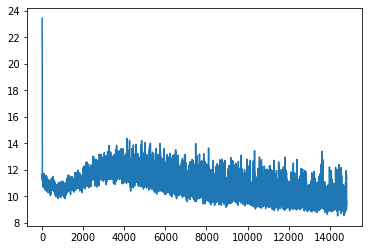

In [9]:
plt.plot(icsList_BN.ics_values)

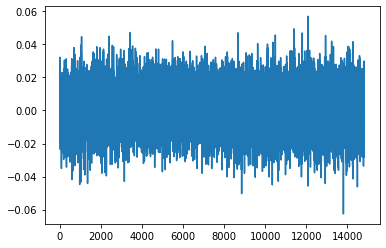

In [10]:
plt.plot(icsList_BN.cos_values)

In [11]:
vgg = VGG(make_layers(batch_norm=False), num_classes=data.c)
vgg.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [12]:
learn_vgg = Learner(data, vgg, opt_func=optimizer,
                               loss_func=criterion,
                               true_wd=False,
                               wd=0.,
                               bn_wd=False,
                               metrics=accuracy)

accList_noBN = AccuracyList(learn_vgg)
icsList_noBN = ICS(learn_vgg, num_classes=data.c, bn=False )

In [13]:
learn_vgg.fit(38, lr=0.1, callbacks=[accList_noBN, icsList_noBN])

epoch,train_loss,valid_loss,accuracy,time
0,2.300207,2.299042,0.186700,01:01
1,2.284167,2.273000,0.157300,01:02
2,2.136613,2.128801,0.200200,01:02
3,2.017854,2.050605,0.231000,01:01
4,1.926803,1.927207,0.291500,01:02
5,1.827263,1.853068,0.326900,01:02
6,1.758486,1.718757,0.370000,01:01
7,1.673092,1.668572,0.400500,01:01
8,1.588345,1.559505,0.427000,01:01
9,1.507988,1.437134,0.471300,01:01


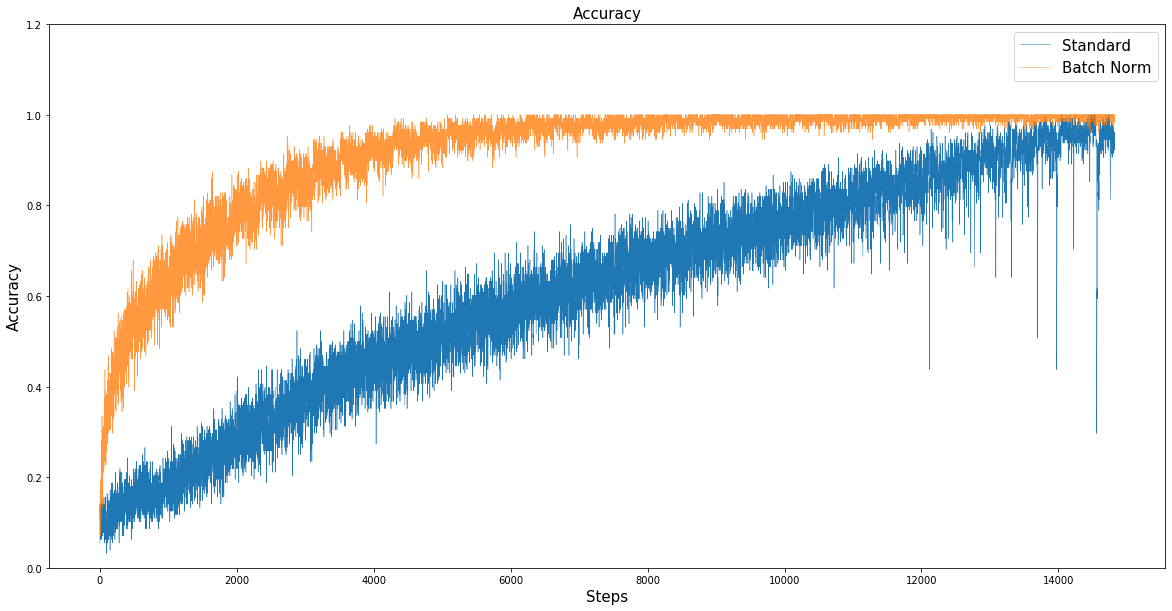

In [37]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=1.2, bottom=0)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("Accuracy", fontsize=15)
plt.plot(accList_noBN.accs, linewidth=0.5, label="Standard")
plt.plot(accList_BN.accs, linewidth=0.5, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)

plt.savefig('ACC.pdf')
plt.savefig('ACC.png')

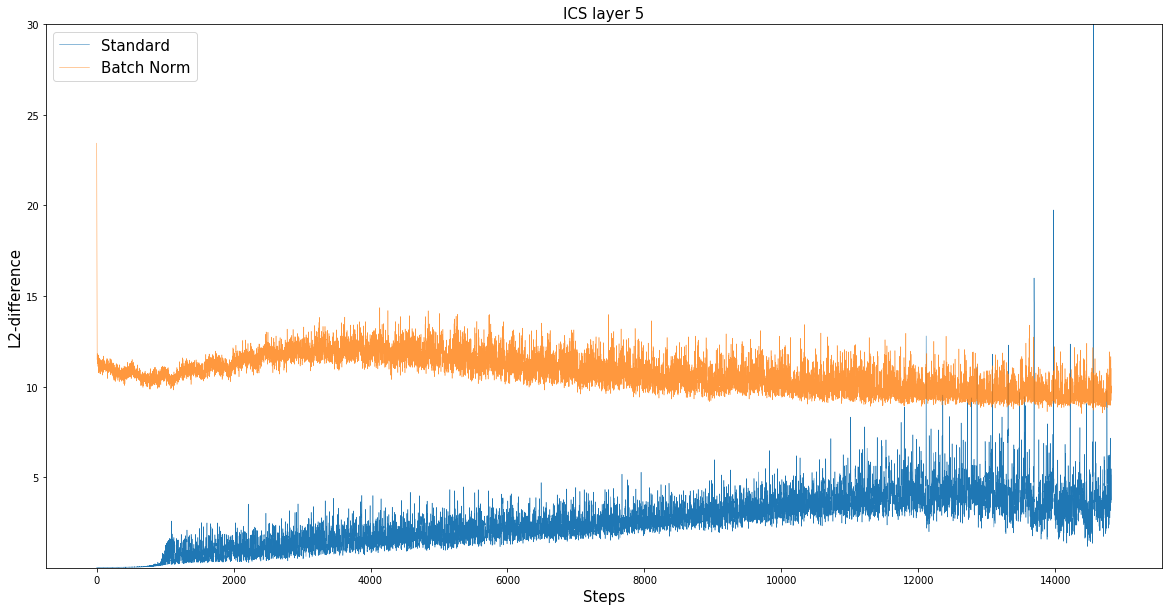

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=30, bottom=0.01)
plt.ylabel("L2-difference", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("ICS layer 5", fontsize=15)
plt.plot(icsList_noBN.ics_values, linewidth=0.5, label="Standard")
plt.plot(icsList_BN.ics_values, linewidth=0.5, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)

plt.savefig('ICS.pdf')
plt.savefig('ICS.png')

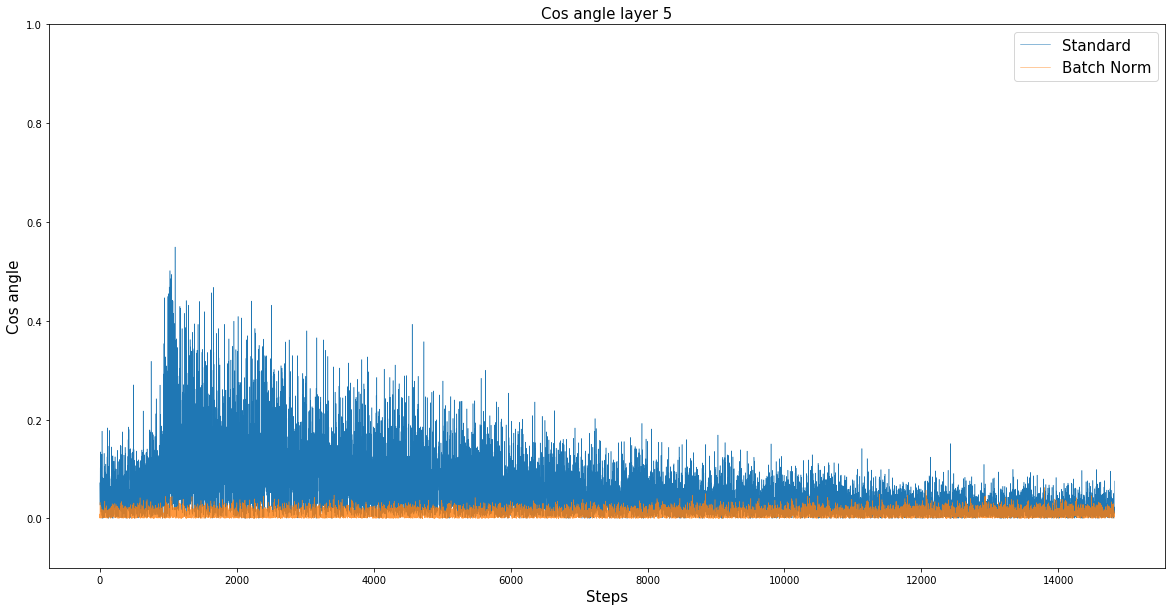

In [39]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=1, bottom=-0.1)
plt.ylabel("Cos angle", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("Cos angle layer 5", fontsize=15)
plt.plot([abs(e) for e in icsList_noBN.cos_values], linewidth=0.5, label="Standard")
plt.plot([abs(e) for e in icsList_BN.cos_values], linewidth=0.5, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)

plt.savefig('COS.pdf')
plt.savefig('COS.png')